In [1]:
from generate_fragments import generate_fragments
from Multi_Nuclei_Segmentation import create_images, optimise_fragments, multi_segmentation
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import gaussian_filter

43it [00:55,  1.29s/it]


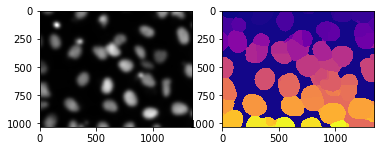

In [2]:
image = plt.imread('images/dna-images/gnf/dna-5.png')[...,0]   
Omega,S = generate_fragments(image,16,0.01,20,2,100)


gaus_img = gaussian_filter(image,16)
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(gaus_img,cmap='gray')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(Omega,cmap='plasma')

In [3]:
Z = list(S)
ListOfCoords = create_images(Omega, Z)
len(Z)

615

In [4]:
theta, f = optimise_fragments(image, ListOfCoords)

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   4 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-2)]: Done  11 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-2)]: Done  18 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-2)]: Done  27 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-2)]: Done  47 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-2)]: Done  58 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-2)]: Done  71 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-2)]: Done  84 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-2)]: Done  99 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-2)]: Done 114 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-2)]: Done 131 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-2)]: Done 148 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-2)]: Done 167 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:  2

In [5]:
seg = multi_segmentation(image, Omega, list(S), f, np.median(f), theta)

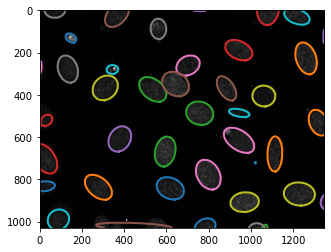

In [8]:
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for ellipse in seg:
    for contour in ellipse:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
plt.show()

In [7]:
seg

[[array([[1029. ,  733.5],
         [1028. ,  733.5],
         [1027. ,  733.5],
         [1026.5,  734. ],
         [1026. ,  734.5],
         [1025. ,  734.5],
         [1024. ,  734.5],
         [1023.5,  735. ],
         [1023. ,  735.5],
         [1022. ,  735.5],
         [1021.5,  736. ],
         [1021. ,  736.5],
         [1020. ,  736.5],
         [1019.5,  737. ],
         [1019. ,  737.5],
         [1018. ,  737.5],
         [1017.5,  738. ],
         [1017. ,  738.5],
         [1016. ,  738.5],
         [1015.5,  739. ],
         [1015. ,  739.5],
         [1014.5,  740. ],
         [1014. ,  740.5],
         [1013. ,  740.5],
         [1012.5,  741. ],
         [1012. ,  741.5],
         [1011.5,  742. ],
         [1011. ,  742.5],
         [1010.5,  743. ],
         [1010. ,  743.5],
         [1009.5,  744. ],
         [1009. ,  744.5],
         [1008. ,  744.5],
         [1007.5,  745. ],
         [1007. ,  745.5],
         [1006.5,  746. ],
         [1006. ,  746.5],
 